In [3]:
import sys
sys.path.insert(0, "/path/to/fastai/v.0.7")
%matplotlib inline
from ipyexperiments import *
from fastai import *
from fastai.text import *
import pandas as pd
import numpy as np
from path import Path


pd.set_option('display.max_columns', 50)



ModuleNotFoundError: No module named 'fastai'

In [3]:
MODELS = Path('./models/AWD_LSTM')
DATA = Path('./data')

df = pd.read_parquet(DATA / 'mbti_1.pqt', 'fastparquet')
train = df[df.is_valid == False]
val = df[df.is_valid == True]

NameError: name 'Path' is not defined

In [15]:
data_lm = load_data(MODELS, 'data_lm_export.pkl')

In [16]:
data_clas = TextClasDataBunch.from_df(MODELS, train_df=train,
                                      valid_df=val, vocab=data_lm.train_ds.vocab, bs=32)

In [17]:
data_clas.save('data_clas_export.pkl')

In [21]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=1.0)
learn.load_encoder('awd1')
    

In [22]:
data_clas.show_batch()

text,target
"xxbos xxup mbti : xxmaj subtype : xxmaj compatible xxmaj matches : xxmaj cognitive xxmaj functions : xxmaj global 5 : xxmaj enneagram xxmaj triptype : xxmaj variant : xxmaj archetype : xxmaj xxunk : xxmaj xxunk : / / www.youtube.com / watch?v = xxunk you xxmaj schizo , xxmaj borderline , or xxmaj narcissistic ? i am xxmaj borderline . xxmaj also , i am the xxmaj hermit but",INFP
"xxbos ' xxmaj enough so that only risk starvation , jail and / or execution can make me abandon my values . xxmaj that is to say , few circumstances can make me act in a manner contrary to my values . xxmaj this does not mean that ... |||not uncommon . xxmaj probably enneatype 6 , too . xxmaj some people feel awkward and inadequate when they bring up",ENTJ
"xxbos ' xxmaj well , we 're * r xxrep 15 e aly * similar . xxmaj often , the only person who gets my xxup enfp humor is my xxup infp friend . xxmaj and we can talk forever about anything . xxmaj but where i see the difference is in the little ... |||as an xxup enfp , xxmaj ne is my life , so i ca n't",ENFP
"xxbos xxmaj that 's what i 'm leaning towards to as well . xxmaj at first i left a door open for xxmaj ni dom as well ( because there was -and still is- too little content to not keep the horizon of possibilities wider ) but he ... |||about xxup wanna xxup one : xxmaj xxunk - introvert , xxmaj fe usage seems much more likely than xxmaj fi",ISTP
"xxbos ' xxmaj this is so awesome ! xxup yes , this is what i was trying to say . xxmaj now i get it . xxmaj by doing xxmaj se activities , you are getting out of your xxmaj ni , which is your dominant function . xxmaj this is so cool ! xxmaj yes , these ... |||hello everyone , xxmaj the 2 intjs that i know are",INFP


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


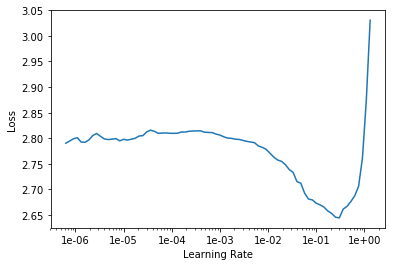

In [23]:
learn.lr_find()
learn.recorder.plot()

In [24]:
learn.fit_one_cycle(2, 3e-2)

epoch,train_loss,valid_loss,accuracy,time
0,2.160086,2.027992,0.285303,04:43
1,2.046718,1.999970,0.320461,04:42
